## Package Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler   
from sklearn.metrics import confusion_matrix  

## Retrieve data from Dataset

In [2]:
data = pd.read_csv("./archive/heart.csv")

## Dataset statistics

Top rows of the dataset

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataset statistics summary

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Dataset shape

In [5]:
print(data.shape)

(303, 14)


Dataset types

In [6]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


Are there any null values?

In [7]:
any(data.isnull().sum())

False

Drop dataframe duplicates

In [8]:
data.drop_duplicates(keep='first', inplace=True)

Dataset shape after droping duplicated values:

In [9]:
print(data.shape)

(302, 14)


### Correlation Matrix

A correlation matrix is a very important table which displays the correlation coefficients between all different pair of variables in a dataset (input + output variables). 

<AxesSubplot:>

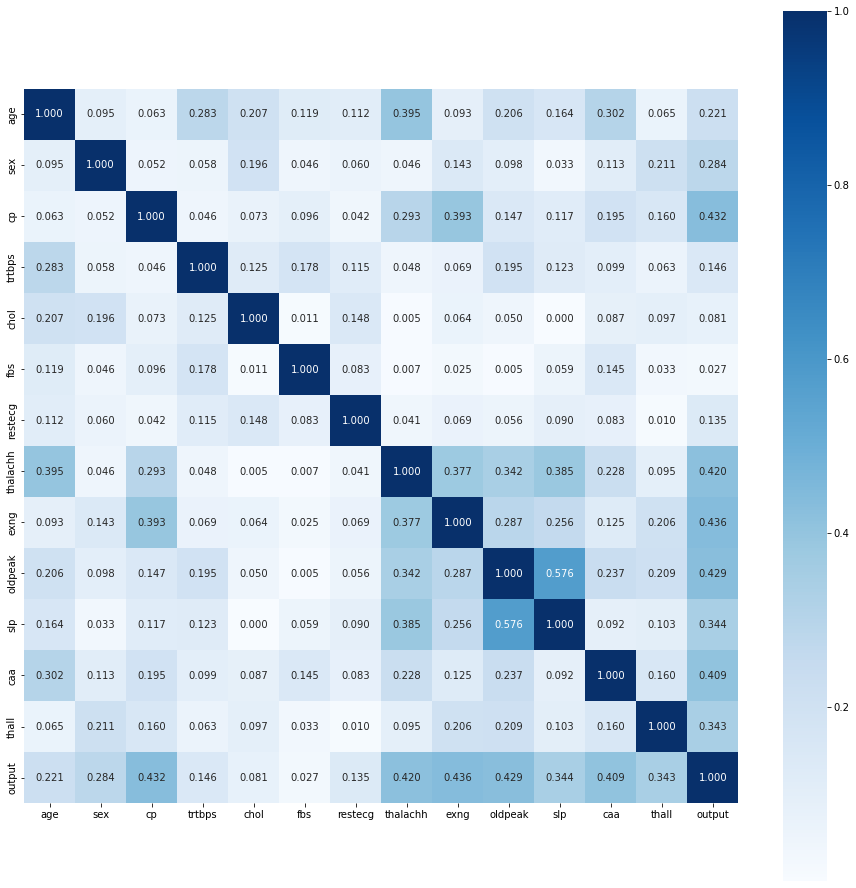

In [10]:
f, ax = plt.subplots(figsize=(16, 16))
correlation = data.corr()
sns.heatmap(abs(correlation), fmt='.3f', annot=True, cmap="Blues", square=True, ax=ax)

The correlation matrix promotes a fast way to identify patterns in the dataset. However, we want to see what input variables have the biggest correlation with the target variable (output). Thus, it's important to verify the *output* column to visualize what input variables have the most influence over the prediction of an heart attack in a person.

exng        0.435601
cp          0.432080
oldpeak     0.429146
thalachh    0.419955
caa         0.408992
slp         0.343940
thall       0.343101
sex         0.283609
age         0.221476
trtbps      0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: output, dtype: float64


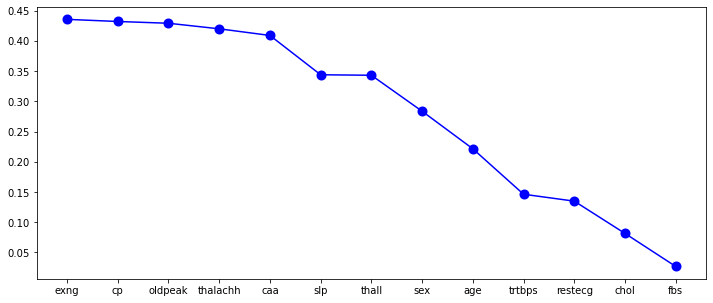

In [11]:
# Dataframe with the correlation between output and input variables and plot figure
output_correlation = abs(correlation["output"]).sort_values(ascending=False)[1:]
print(output_correlation)

plt.figure(figsize=(12,5))
plt.plot(output_correlation.index, output_correlation, color="blue")
plt.scatter(output_correlation.index, output_correlation, color="blue", lw=4)
plt.show()

Analyzing the printed data and the scatter graph, we can say that the most output correlated input variable is *exng* with 0.436757 and the least output correlated input variable is *fbs* with 0.028046.

No input variable is highly correlated with the target variable.

# Analysis

## Uni-variate analysis

### Output distribution

Text(0, 0.5, 'Count')

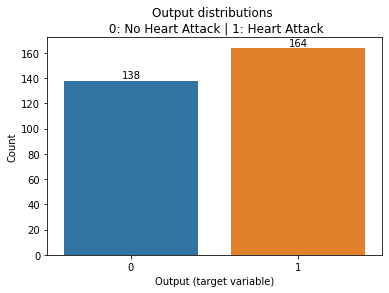

In [12]:
ax = sns.countplot(x='output', data=data)
ax.bar_label(ax.containers[0])
plt.title('Output distributions \n 0: No Heart Attack | 1: Heart Attack', fontsize=12)
plt.xlabel('Output (target variable)')
plt.ylabel('Count')

* ### Pair Plot

<Figure size 1440x1440 with 0 Axes>

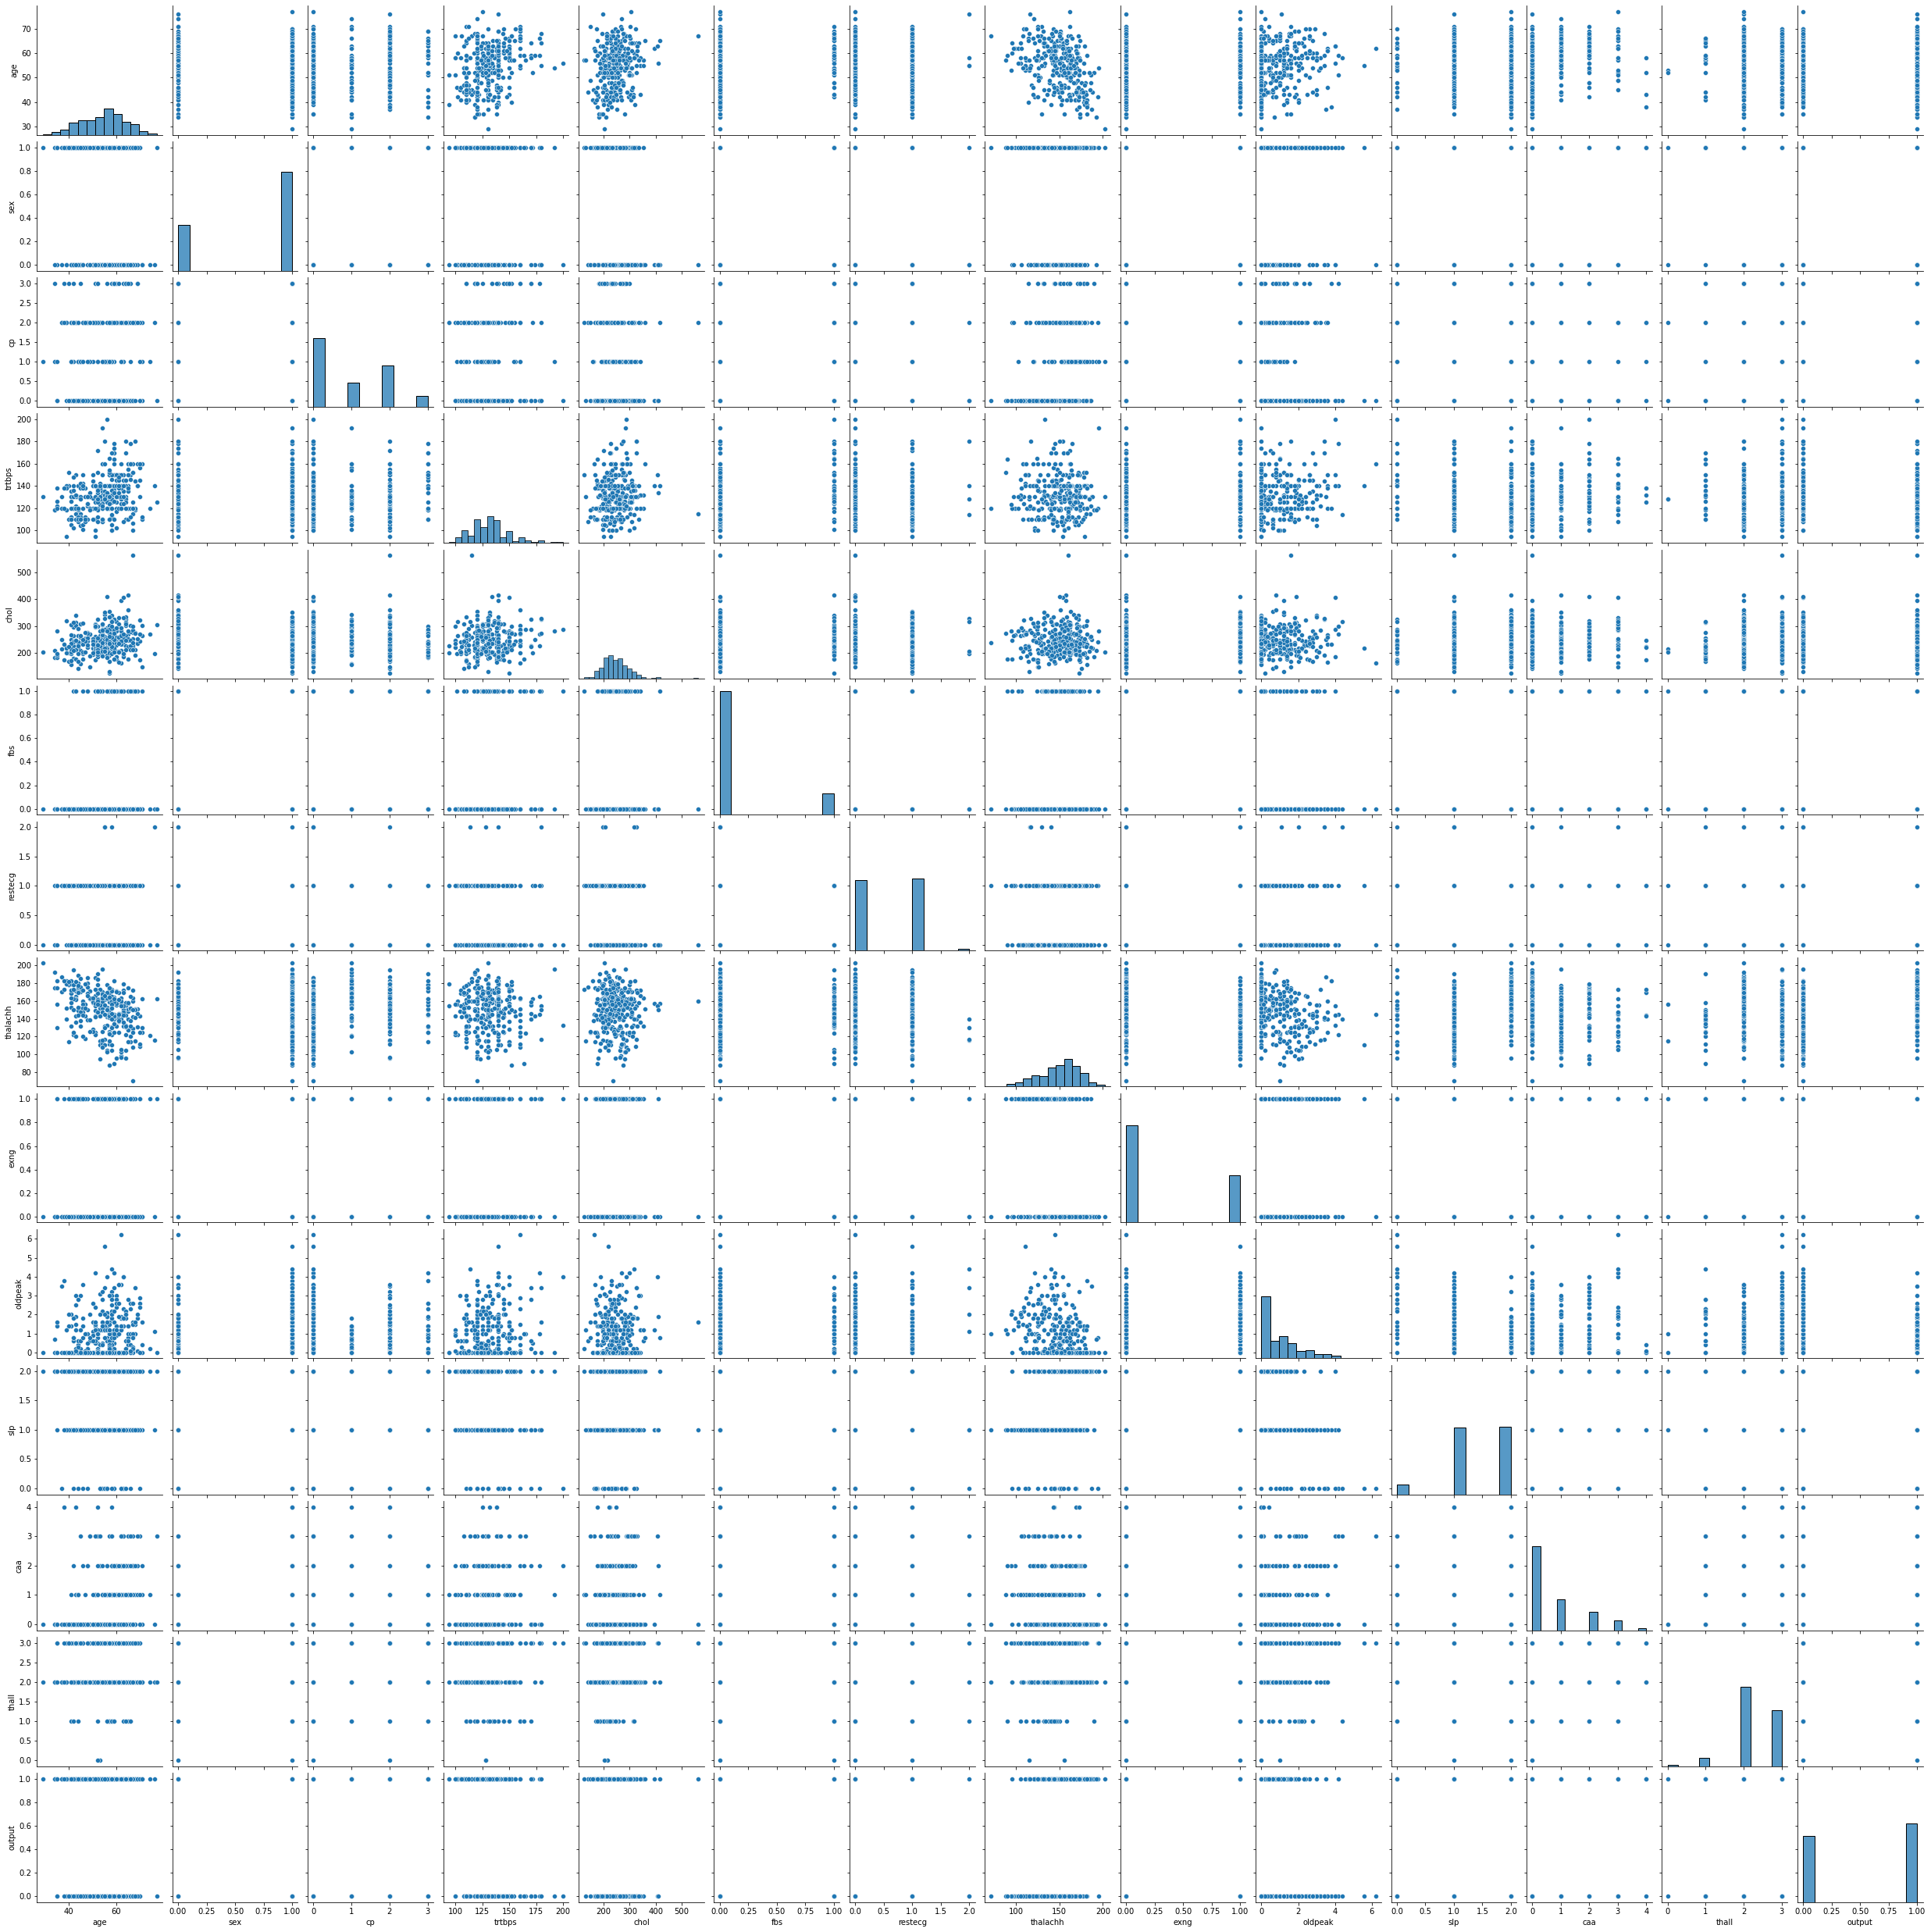

In [13]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

###  For categorical variables:

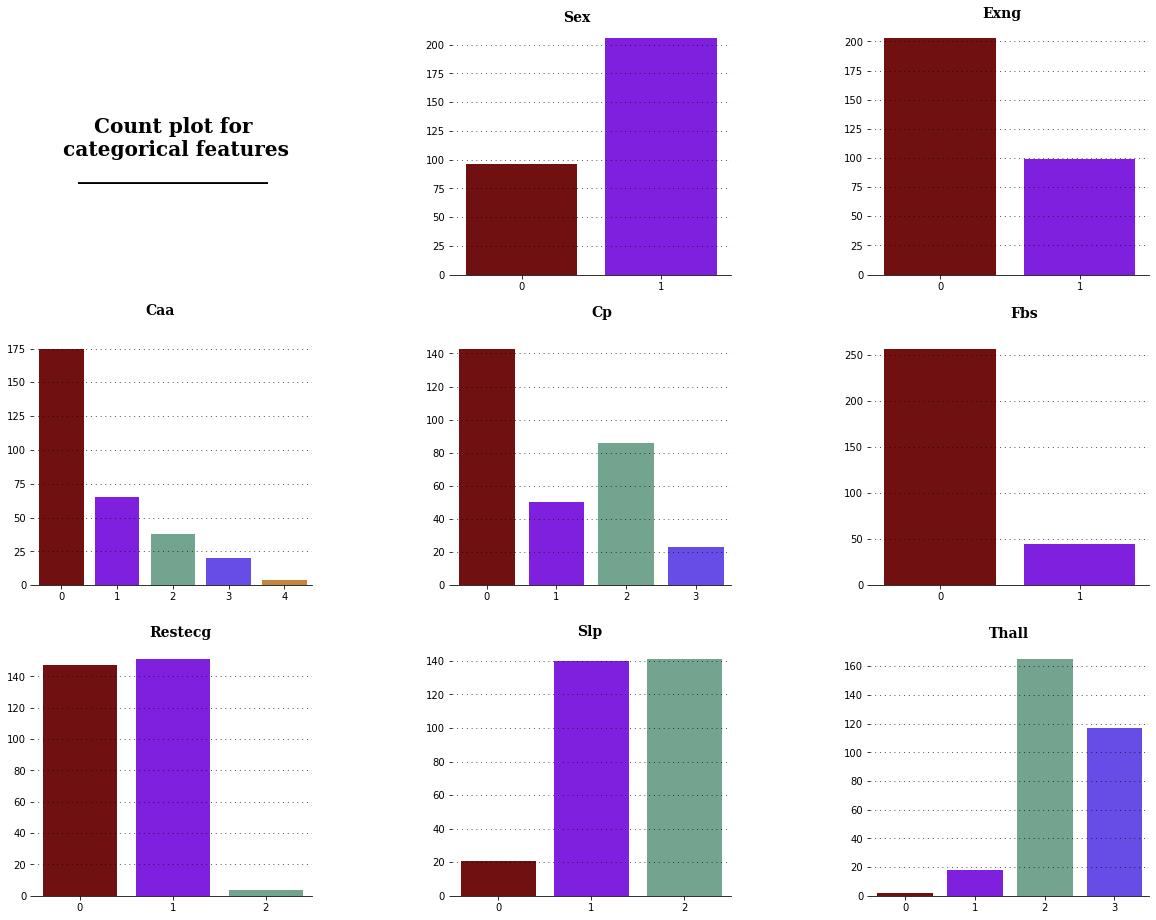

In [40]:
fig = plt.figure(figsize=(20,16))

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
grid = fig.add_gridspec(3,3)
grid.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])
ax2 = fig.add_subplot(grid[0,2])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])
ax5 = fig.add_subplot(grid[1,2])
ax6 = fig.add_subplot(grid[2,0])
ax7 = fig.add_subplot(grid[2,1])
ax8 = fig.add_subplot(grid[2,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
fig.patch.set_facecolor(background_color) 
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for\n categorical features\n___________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, fontweight='bold',
         fontfamily='serif',
         color="#000000")

for idx, ax in enumerate(axes):
    if idx == 0:
        continue
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.countplot(ax=ax,data=data,x=cat_cols[idx-1],palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")


ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")


for s in ["top","right","left"]:
    for ax in axes:
        ax.spines[s].set_visible(False)


###  For continuous variables:

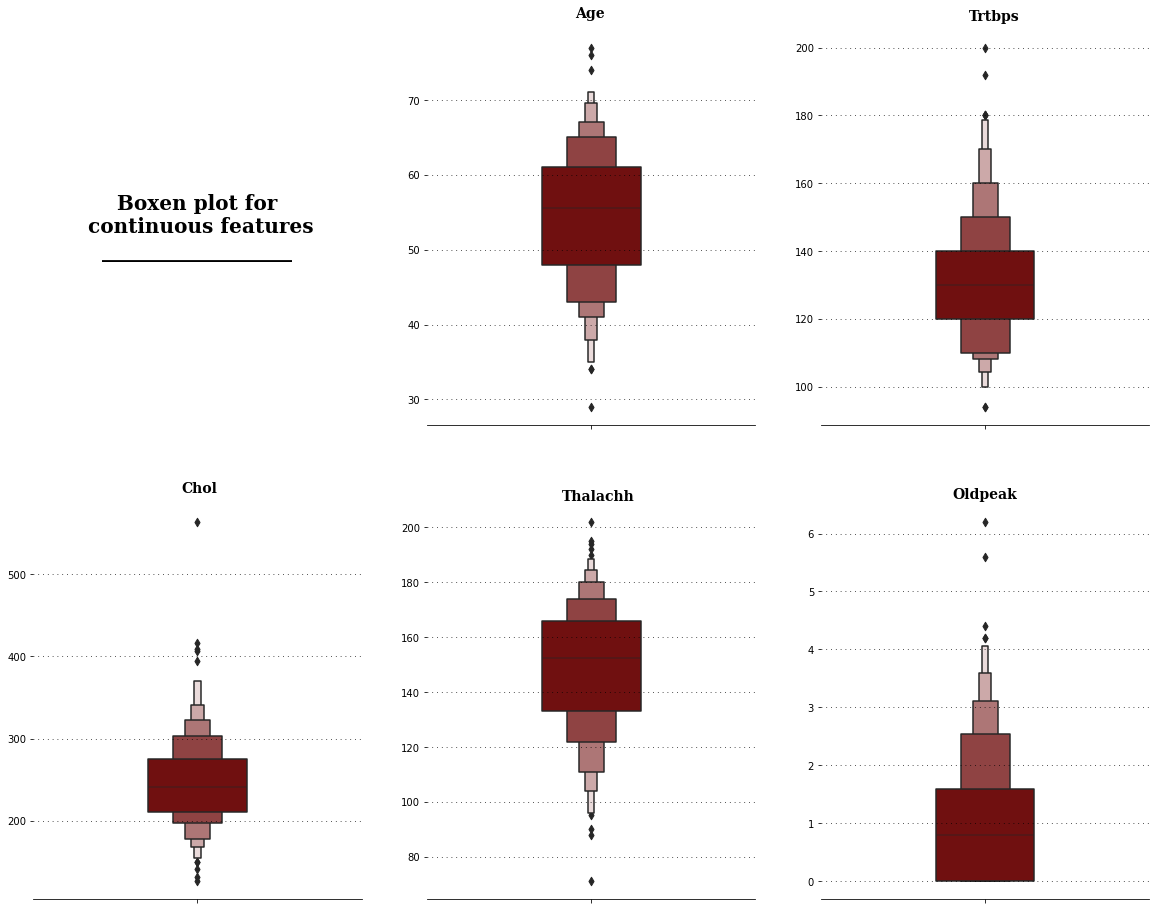

In [47]:
fig = plt.figure(figsize=(20,16))

con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
grid = fig.add_gridspec(2,3)
grid.update(wspace=0.2, hspace=0.2)
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])
ax2 = fig.add_subplot(grid[0,2])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])
ax5 = fig.add_subplot(grid[1,2])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
axes = [ax0,ax1,ax2,ax3,ax4,ax5]
fig.patch.set_facecolor(background_color) 
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for\n continuous features\n___________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, fontweight='bold',
         fontfamily='serif',
         color="#000000")

for idx, ax in enumerate(axes):
    if idx == 0:
        continue
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(ax=ax,data=data,y=con_cols[idx-1],palette=color_palette, width=0.3)
    ax.set_xlabel("")
    ax.set_ylabel("")


ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")


for s in ["top","right","left"]:
    for ax in axes:
        ax.spines[s].set_visible(False)

## Bi-variate analysis

### Output vs. continuous features 

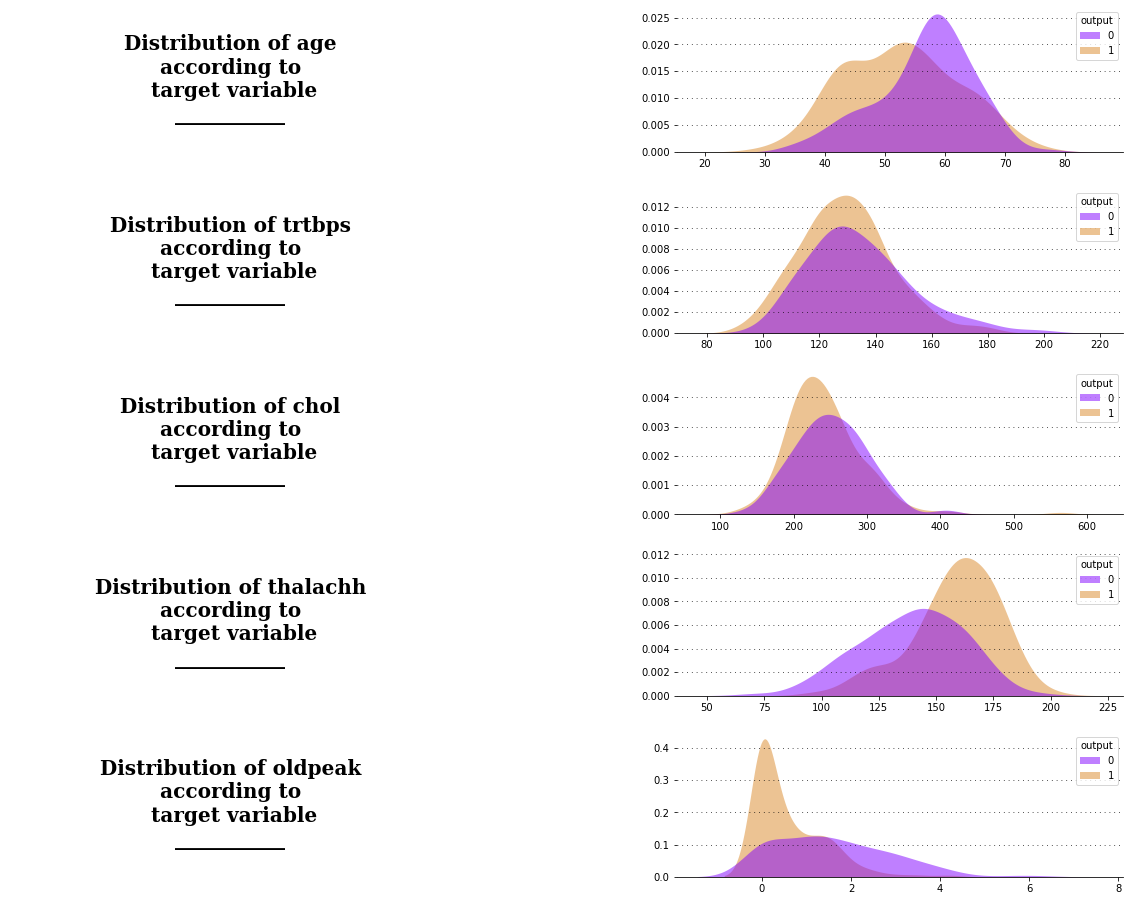

In [59]:
fig = plt.figure(figsize=(20,16))

grid = fig.add_gridspec(5,2)
grid.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])
ax2 = fig.add_subplot(grid[1,0])
ax3 = fig.add_subplot(grid[1,1])
ax4 = fig.add_subplot(grid[2,0])
ax5 = fig.add_subplot(grid[2,1])
ax6 = fig.add_subplot(grid[3,0])
ax7 = fig.add_subplot(grid[3,1])
ax8 = fig.add_subplot(grid[4,0])
ax9 = fig.add_subplot(grid[4,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
fig.patch.set_facecolor(background_color) 
for ax in axes:
    ax.set_facecolor(background_color)

for idx, ax in enumerate(axes):
    if (idx % 2 == 0):
        ax.text(0.5,0.5,"Distribution of " + con_cols[idx // 2] + "\naccording to\n target variable\n___________",
                horizontalalignment = 'center',
                verticalalignment = 'center',
                fontsize = 20,
                fontweight='bold',
                fontfamily='serif',
                color='#000000')
        ax.spines["bottom"].set_visible(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
    else:
        ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
        sns.kdeplot(ax=ax, data=data, x=con_cols[idx // 2], hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
        ax.set_xlabel("")
        ax.set_ylabel("")


for s in ["top","right","left"]:
    for ax in axes:
        ax.spines[s].set_visible(False)


### Output vs. categorical features 

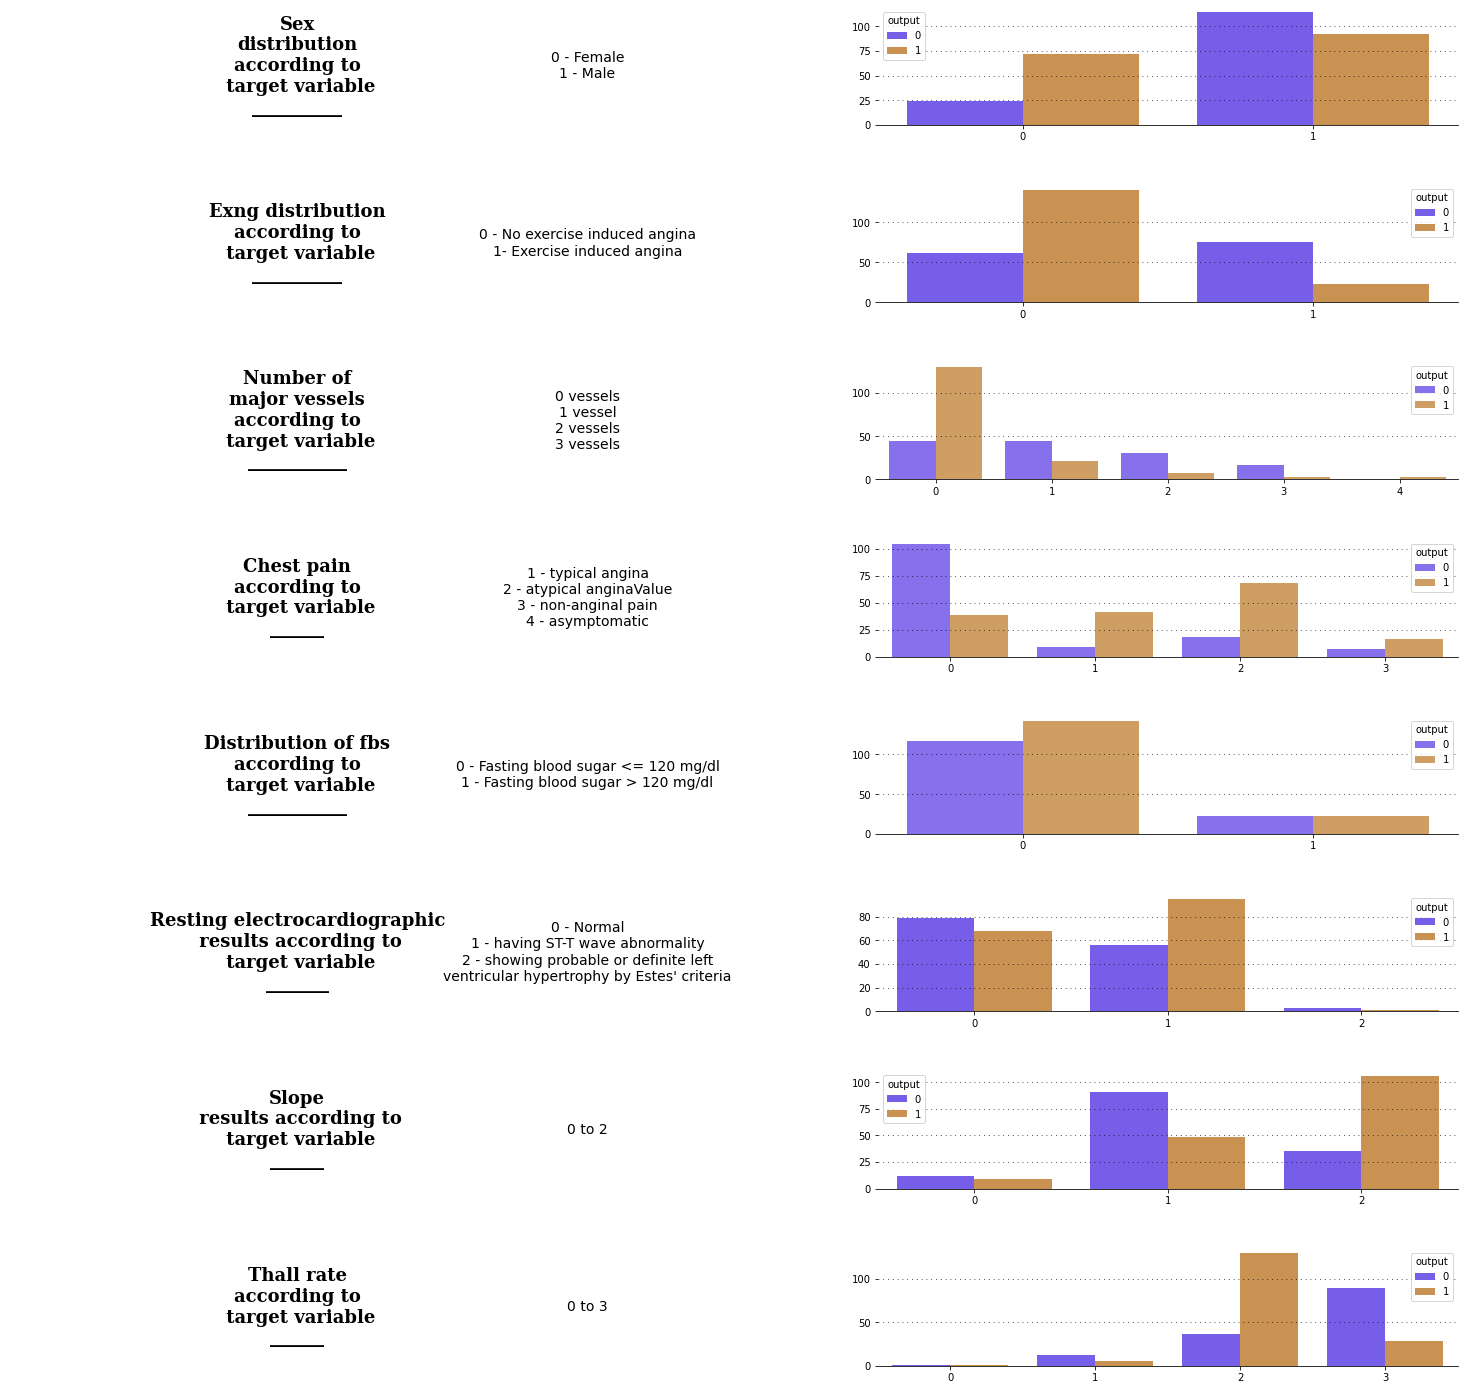

In [76]:
fig = plt.figure(figsize=(26,25))

grid = fig.add_gridspec(8,2)
grid.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])
ax2 = fig.add_subplot(grid[1,0])
ax3 = fig.add_subplot(grid[1,1])
ax4 = fig.add_subplot(grid[2,0])
ax5 = fig.add_subplot(grid[2,1])
ax6 = fig.add_subplot(grid[3,0])
ax7 = fig.add_subplot(grid[3,1])
ax8 = fig.add_subplot(grid[4,0])
ax9 = fig.add_subplot(grid[4,1])
ax10 = fig.add_subplot(grid[5,0])
ax11 = fig.add_subplot(grid[5,1])
ax12 = fig.add_subplot(grid[6,0])
ax13 = fig.add_subplot(grid[6,1])
ax14 = fig.add_subplot(grid[7,0])
ax15 = fig.add_subplot(grid[7,1])

background_color = "#ffffff"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
axes = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]

fig.patch.set_facecolor(background_color) 
for ax in axes:
    ax.set_facecolor(background_color)


# cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

# Sex text
ax0.text(0.5,0.5,"Sex\ndistribution\naccording to\n target variable\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14
        )


# Sex
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=data, x='sex',hue="output", fill=True,palette=["#5833ff","#da8829"], alpha=0.9, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")





# exng text
ax2.text(0.5,0.5,"Exng distribution\naccording to\n target variable\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
ax2.text(1,.5,"0 - No exercise induced angina\n1- Exercise induced angina",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14
        )


# exng
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3, data=data, x='exng',hue="output", fill=True,palette=["#5833ff","#da8829"], alpha=0.9, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")


# Caa title
ax4.text(0.5,0.5,"Number of\nmajor vessels\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Caa
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=data, x='caa',hue="output", fill=True,palette=["#5833ff","#da8829"], alpha=0.8)
ax5.set_xlabel("")
ax5.set_ylabel("")

# cp text
ax6.text(0.5,0.5,"Chest pain\naccording to\n target variable\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"1 - typical angina\n2 - atypical anginaValue\n3 - non-anginal pain\n4 - asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# cp 
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=data, x='cp',hue="output", fill=True,palette=["#5833ff","#da8829"], alpha=0.8)
ax7.set_xlabel("")
ax7.set_ylabel("")

# fbs text
ax8.text(0.5,0.5,"Distribution of fbs\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"0 - Fasting blood sugar <= 120 mg/dl\n1 - Fasting blood sugar > 120 mg/dl",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# fbs 
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax9, data=data, x='fbs',hue="output", fill=True,palette=["#5833ff","#da8829"], alpha=0.8)
ax9.set_xlabel("")
ax9.set_ylabel("")

# restecg title
ax10.text(0.5,0.5,"Resting electrocardiographic\n results according to\n target variable\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"0 - Normal\n1 - having ST-T wave abnormality\n2 - showing probable or definite left\nventricular hypertrophy by Estes' criteria",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)

# restecg
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax11, data=data, x='restecg',hue="output", fill=True,palette=["#5833ff","#da8829"], alpha=0.9)
ax11.set_xlabel("")
ax11.set_ylabel("")



# slp title
ax12.text(0.5,0.5,"Slope\n results according to\n target variable\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax12.spines["bottom"].set_visible(False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.tick_params(left=False, bottom=False)

ax12.text(1,.5,"0 to 2",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )


# slp
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax13, data=data,x='slp',hue='output',palette=["#5833ff","#da8829"], alpha=0.9)
ax13.set_xlabel("")
ax13.set_ylabel("")



# thall title
ax14.text(0.5,0.5,"Thall rate\naccording to\n target variable\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax14.spines["bottom"].set_visible(False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.tick_params(left=False, bottom=False)

ax14.text(1,.5,"0 to 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )


# thall
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax15, data=data,x='thall',hue='output',palette=["#5833ff","#da8829"], alpha=0.9)
ax15.set_xlabel("")
ax15.set_ylabel("")


for s in ["top","right","left"  ]:
    for ax in axes:
        ax.spines[s].set_visible(False)


## Models

In [15]:
# [fonte]: https://www.javatpoint.com/logistic-regression-in-machine-learning

# creating a copy of data
data1 = data

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
data1 = pd.get_dummies(data1, columns = cat_cols, drop_first = True)

# defining the features and target
X = data1.drop(['output'],axis=1)
y = data1[['output']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling and normalization of data
st_x = StandardScaler()    
X_train = st_x.fit_transform(X_train)    
X_test = st_x.transform(X_test)  


* ### Logistic Regression

 https://www.javatpoint.com/logistic-regression-in-machine-learning

In [21]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# finding the predicted valued
y_pred = logreg.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred) * 100 ,"%")

cm = confusion_matrix(y_test, y_pred)  
print("The confusion matrix of Logistric Regression is \n", cm)

The test accuracy score of Logistric Regression is  88.52459016393442 %
The confusion matrix of Logistric Regression is 
 [[27  2]
 [ 5 27]]


/home/ricardo/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
